<a href="https://colab.research.google.com/github/vivobino/facedetectiondemo/blob/main/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/facedetectionproject/traindata'

In [ ]:
!ls folder_path

ls: cannot access 'folder_path': No such file or directory


In [ ]:
import numpy
import cv2
import os
import pandas
import matplotlib.pyplot as plt



In [ ]:
imagepath = os.path.join(":/content/drive/MyDrive/traindata" ,'images')

#the image path


#read the image

In [ ]:
images = cv2.imread(":/content/drive/MyDrive/traindata ")

#print dimensions of the arrays

In [ ]:
image = cv2.imread(":/content/drive/MyDrive/traindata /IMG_20241210_111909_614 (1).jpg")

In [ ]:
img = cv2.imread(":/content/drive/MyDrive/traindata /IMG_20241210_111909_614.jpg")

In [ ]:
img = cv2.imread(":/content/drive/MyDrive/traindata /IMG_20241210_111909_614 (1).jpg")

In [ ]:
img = cv2.imread("/content/drive/MyDrive/traindata /IMG_20241210_111931_725.jpg")

In [ ]:
img.shape


(3264, 2448, 3)

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


I have converted the image to gray image, now i examine the gray image shape.

In [ ]:
gray_image.shape


(3264, 2448)

load the classifier


In [ ]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [ ]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

Draw the rectangle that binds the face.

In [ ]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

Display the image

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 2447.5, 3263.5, -0.5)

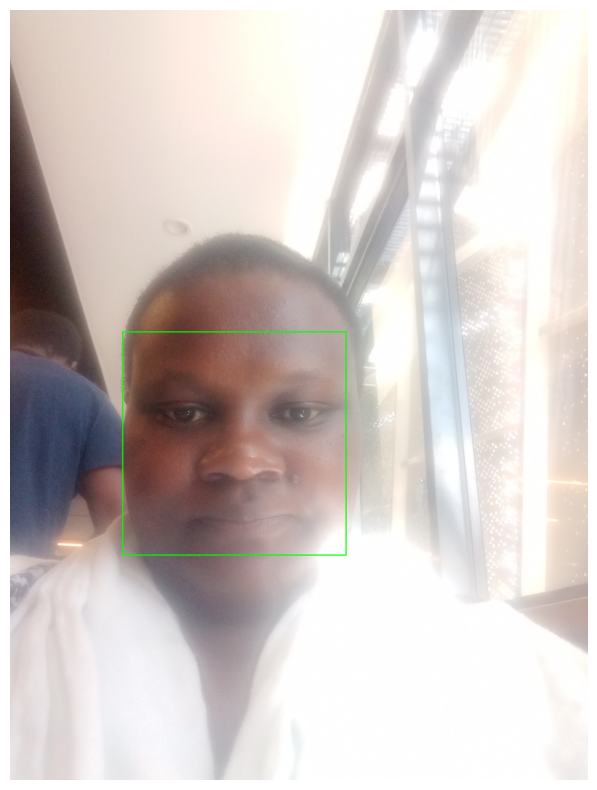

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [ ]:
video_capture = cv2.VideoCapture(0)

Identify faces in the videostream

In [ ]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [ ]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "facedetectionproject", video_frame
    )  # display the processed frame in a window named "facedetectionproject"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

Displays the most similar image from the folder

In [ ]:
bestmatchimagepath = os.path.join("/content/drive/MyDrive/traindata /IMG_20241210_111909_614.jpg")
bestmatchimage = cv2.imread(bestmatchimagepath)
best_match_rgb = cv2.cvtColor(bestmatchimage, cv2.COLOR_BGR2RGB)


Displays captured image with detected faces

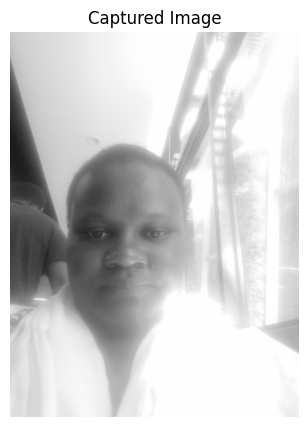

In [ ]:
captured_rgb = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(captured_rgb)
plt.title("Captured Image")
plt.axis('off')
plt.show()


Displays most similar image from the folder

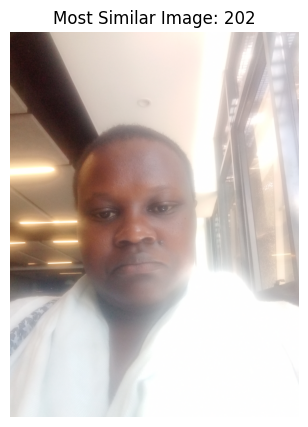

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(best_match_rgb)
plt.title(f"Most Similar Image: {gray_image[0][0]}")
plt.axis('off')
plt.show()

In [74]:
# script for adding a new face
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

face_data = []
i =0
camera = cv2.VideoCapture(0)
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
name = input('Enter your name: ')
ret = True
while(ret):
    ret, frame = camera.read()
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        face_coordinates = facecascade.detectMultiScale(gray, 1.3, 4)

        for (x, y, w, h) in face_coordinates:
            faces = frame[y:y+h, x:x+w, :]
            resized_faces = cv2.resize(faces, (50, 50))

            if i % 10 == 0 and len(face_data) < 10:
                face_data.append(resized_faces)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        i += 1

        cv2.imshow('frames', frame)

        if cv2.waitKey(1) == 27 or len(face_data) >= 10:
            break
    else:
        print('error')
        break

cv2.destroyAllWindows()
camera.release()





Enter your name: Vivian
error


In [85]:
from PIL import Image

In [95]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

